In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc


def Q(x):
    return 0.5 * erfc(x / np.sqrt(2))

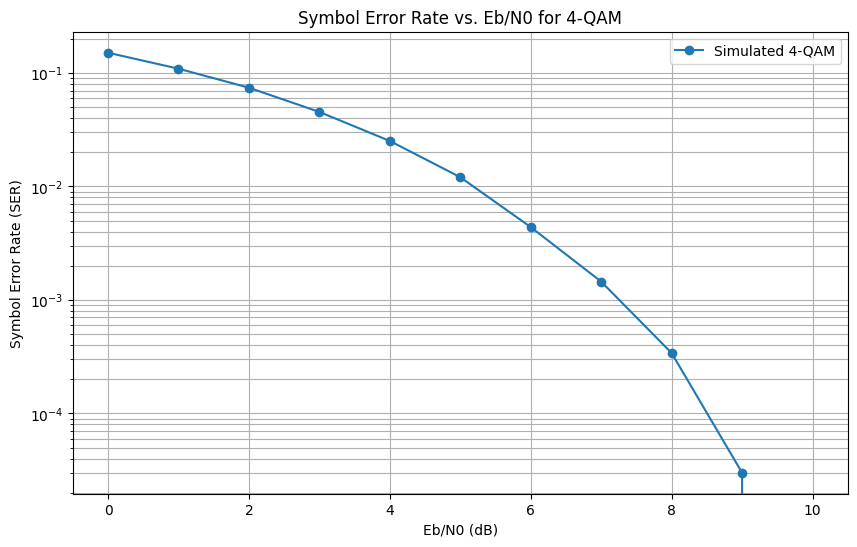

In [2]:
# Definindo a constelação 4-QAM
symbols_constellation = np.array([1+1j, 1-1j, -1+1j, -1-1j])
M = 4
k = np.log2(M)
snr_db_range = np.arange(0, 11, 1)
symbol_sequence_length = int(1e5)

def simulate_ser_4qam(snr_db_range, symbol_sequence_length):
    """Simulate 4-QAM modulation in an AWGN channel and compute SER for each SNR using Monte Carlo simulations."""
    ser = []
    for snr_db in snr_db_range:
        
        snr_linear = 10**(snr_db / 10.0)
        snr_symbol = snr_linear * k
        
        energy_symbol = np.mean(np.abs(symbols_constellation)**2)
        sigma = np.sqrt(energy_symbol/(2*snr_symbol))
        noise = sigma * (np.random.randn(symbol_sequence_length) + 1j * np.random.randn(symbol_sequence_length))
        
        signal = np.random.choice(symbols_constellation, symbol_sequence_length)
        
        signal_with_noise = signal + noise
        
        signal_demod = []
        for symbol in signal_with_noise:
            distances = np.abs(symbol - symbols_constellation)
            demod_symbol = symbols_constellation[np.argmin(distances)]
            signal_demod.append(demod_symbol)
        signal_demod = np.array(signal_demod)
        
        num_errors = np.sum(signal != signal_demod)
        
        ser.append(num_errors / symbol_sequence_length)
    
    return ser

simulated_ser = simulate_ser_4qam(snr_db_range, symbol_sequence_length)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, simulated_ser, 'o-', label='Simulated 4-QAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Symbol Error Rate vs. Eb/N0 for 4-QAM')
plt.legend()
plt.show()

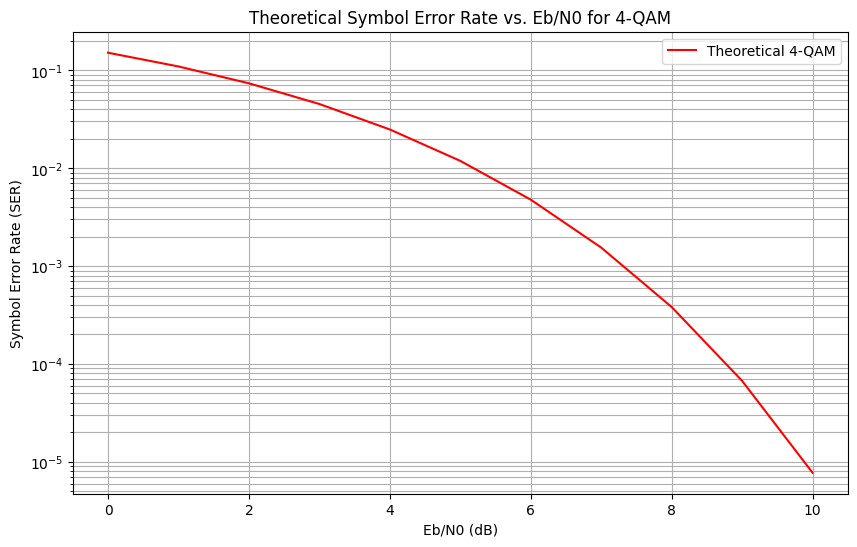

In [3]:
def P_sqrt_M(M, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    Q_arg = np.sqrt((6/(M - 1)) * snr_linear)
    return 2 * (1 - 1/np.sqrt(M)) * Q(Q_arg)

def theoretical_ser(M, snr_db):
    return 1 - (1 - P_sqrt_M(M, snr_db))**2

# Calculate theoretical SER
theoretical_ser = theoretical_ser(M, snr_db_range)

# Plot the theoretical SER
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, theoretical_ser, 'r-', label='Theoretical 4-QAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Theoretical Symbol Error Rate vs. Eb/N0 for 4-QAM')
plt.legend()
plt.show()

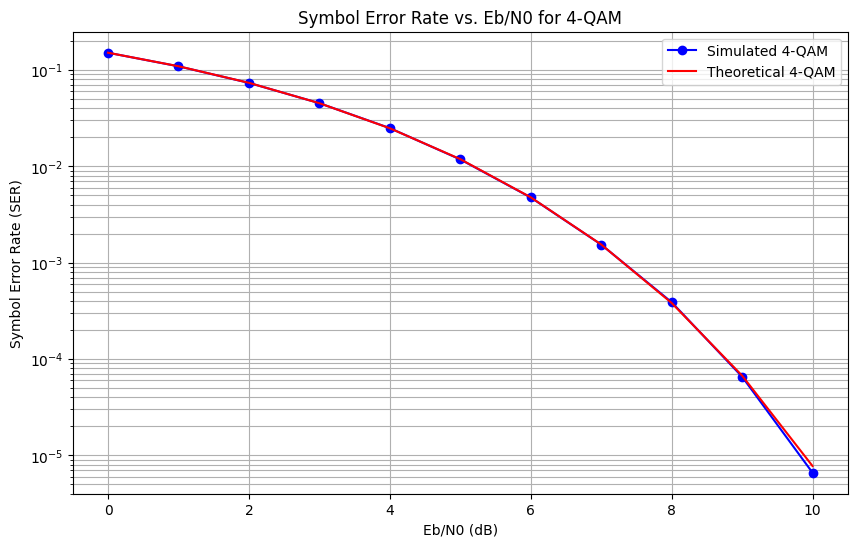

In [16]:
# SIMULATIONA VS THEORETICAL

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, simulated_ser, 'bo-', label='Simulated 4-QAM')
plt.semilogy(snr_db_range, theoretical_ser, 'r-', label='Theoretical 4-QAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Symbol Error Rate vs. Eb/N0 for 4-QAM')
plt.legend()
plt.show()